Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL410250 / EEL7513 / EEL7514 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$

# Exercício 7: Redes Profundas

Neste exercício você irá construir modelos de redes neurais para realizar classificação e experimentar diversas configurações de hiperparâmetros.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.neural_network import MLPClassifier

# Find out NVIDIA GPU model (randomly assigned by Colab)
# Deep learning performance: K80 < P4 < T4 < P100
# https://ai-benchmark.com/ranking_deeplearning.html
gpu = !nvidia-smi -L
print('Not using GPU' if 'failed' in gpu[0] else gpu[0].split(' (')[0])

# For more GPU information, run: 
# !nvidia-smi

GPU 0: NVIDIA GeForce MX450


# 1. Conjunto de dados #1

Para "aquecer", vamos começar utilizando o conjunto XOR do exercício anterior.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X_train, y_train = make_blobs(n_samples=400, n_features=2, centers=[[0,0],[1,1],[0,1],[1,0]], cluster_std=0.15, random_state=0)
y_train = (y_train >= 2).astype(int)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/4, random_state=0)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(300, 2) (300,)
(100, 2) (100,)


1. Usando a biblioteca sklearn, treine uma rede neural para classificação, contendo 1 camada oculta de 10 unidades e ativação relu. Utilize o otimizador Adam com parâmetros padrão, exceto pela taxa de aprendizado (constante), que deve ser escolhida apropriadamente. Obtenha 100% de acurácia de treinamento e de validação e calcule o valor da perda ao final do treinamento. Além disso, trace a curva da perda de treinamento ao longo das épocas.

#### Dicas
- Para obter a curva de perda no treinamento, você pode utilizar `model.loss_curve_`.
- Note que o sklearn usa uma terminologia por vezes inconsistente com a literatura da área (mas consistente internamente em sua API). Por exemplo, o parâmetro `max_iter` corresponde ao número de épocas, não necessariamente ao número de atualizações de pesos. Outro aspecto incômodo é juntar todos os hiperparâmetros do treinamento dentro da definição do modelo, o que além de tornar a chamada extensa, faz com que, dependendo da configuração, alguns parâmetros se tornem desnecessários ou mudem de definição.

/home/luiz/codigos/estudos_ml/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Train accuracy: 100.0%
  Val accuracy: 100.0%
Loss: 0.04514548981505887


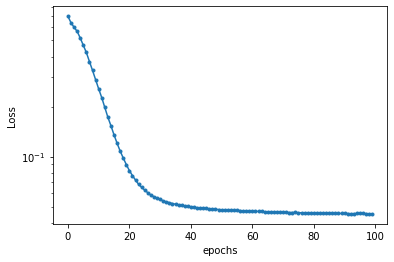

In [3]:
model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam',alpha = 0.1,learning_rate_init=0.1,learning_rate='adaptive', max_iter=100)
model.fit(X_train, y_train)
print('Train accuracy: {:.1%}'.format(model.score(X_train, y_train)))
print('  Val accuracy: {:.1%}'.format(model.score(X_val, y_val)))
print('Loss:', model.loss_)
plt.semilogy(model.loss_curve_, '.-');
plt.ylabel('Loss'); 
plt.xlabel('epochs');

2. Repita o item anterior usando [Keras](https://keras.io/), a API de alto-nível do [TensorFlow](https://www.tensorflow.org/), disponível através do módulo `tensorflow.keras`. Certifique-se de estar usando TensorFlow 2.x.


### Dicas
- Ao invés de instalar o TensorFlow e rodar localmente em sua máquina, uma opção mais simples é utilizar o serviço em nuvem gratuito [Google Colab](https://colab.research.google.com), que já possui todas as bibliotecas necessárias instaladas, inclusive o TensorFlow 2.x.

- Leia a documentação do Keras para aprender a utilizá-lo. Para quem está começando, é recomendável (e suficiente para este exercício) usar a classe [Sequential](https://keras.io/guides/sequential_model). É útil também conhecer sobre funções de [ativação](https://keras.io/activations), funções de [perda](https://keras.io/losses), métodos de [otimização](https://keras.io/api/optimizers) e o processo de [treinamento e avaliação](https://keras.io/guides/training_with_built_in_methods/) de modelos.
- **No Keras, ao contrário do sklearn, é necessário especificar explicitamente a camada de saída, sua função de ativação, e a função de perda utilizada.** (No sklearn, essa escolha é automática a partir dos valores encontrados em `y_train`.) Como se trata de classificação binária, você deve utilizar uma camada de saída com 1 unidade e ativação sigmóide.
- É recommendável utilizar o comando `model.summary()` para obter uma descrição de todas as camadas da rede neural.
- Para configurar a taxa de aprendizado, é necessário instanciar um otimizador, caso contrário será usado o valor padrão.
- Para obter a curva de perda no treinamento, utilize 
```python
history = model.fit(...)
history.history['loss']
```
- Se quiser garantir a reprodutibilidade (desde que não esteja usando GPU), utilize `tf.random.set_seed()` **antes** de definir o modelo (os pesos são inicializados no momento da adição de cada camada).


In [4]:
def plots(history):
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], '.-', label='Train loss')
  if 'val_loss' in history.history.keys():
    plt.plot(history.history['val_loss'], '.-', label='Val loss')
  plt.xlabel('Epochs');
  plt.legend();
  plt.grid();
  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], '.-', label='Train accuracy')
  plt.xlabel('Epochs');
  if 'val_accuracy' in history.history.keys():
    plt.plot(history.history['val_accuracy'], '.-', label='Val accuracy')
  plt.legend();
  plt.grid();

2022-06-14 09:19:38.446653: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-14 09:19:38.474230: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 09:19:38.474240: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Epoch 1/100


2022-06-14 09:19:46.770435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 09:19:46.770704: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 09:19:46.770794: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-14 09:19:46.770857: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-14 09:19:46.770920: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

5/5 [==============================] - 0s 42ms/step - loss: 0.7398 - accuracy: 0.4433 - val_loss: 0.7429 - val_accuracy: 0.4300
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7372 - accuracy: 0.4267 - val_loss: 0.7399 - val_accuracy: 0.3900
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7346 - accuracy: 0.4067 - val_loss: 0.7372 - val_accuracy: 0.3600
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7323 - accuracy: 0.3733 - val_loss: 0.7345 - val_accuracy: 0.3000
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7299 - accuracy: 0.2867 - val_loss: 0.7320 - val_accuracy: 0.2800
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7276 - accuracy: 0.2500 - val_loss: 0.7295 - val_accuracy: 0.2300
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7254 - accuracy: 0.2233 - val_loss: 0.7271 - val_accuracy: 0.2200
Epoch 8/100
5/5 [=====================

5/5 [==============================] - 0s 4ms/step - loss: 0.6082 - accuracy: 0.9500 - val_loss: 0.5971 - val_accuracy: 0.9700
Epoch 60/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6058 - accuracy: 0.9533 - val_loss: 0.5945 - val_accuracy: 0.9600
Epoch 61/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6034 - accuracy: 0.9467 - val_loss: 0.5919 - val_accuracy: 0.9700
Epoch 62/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6010 - accuracy: 0.9467 - val_loss: 0.5893 - val_accuracy: 0.9700
Epoch 63/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5985 - accuracy: 0.9467 - val_loss: 0.5865 - val_accuracy: 0.9700
Epoch 64/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5959 - accuracy: 0.9500 - val_loss: 0.5837 - val_accuracy: 0.9700
Epoch 65/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5935 - accuracy: 0.9567 - val_loss: 0.5808 - val_accuracy: 0.9700
Epoch 66/100
5/5 [===============

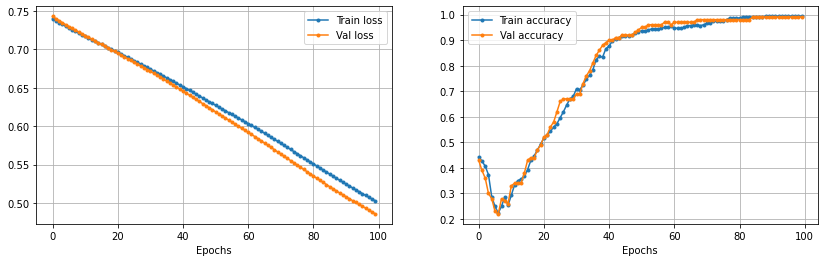

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val, y_val))
plots(history)
model.summary()

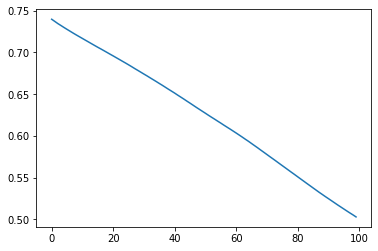

In [6]:
plt.plot(history.history["loss"])

# 2. Conjunto de dados #2

A partir de agora, desenvolva seus modelos de aprendizado profundo utilizando o Keras/TensorFlow, o qual possui muito mais recursos do que o sklearn e é mais otimizado para desempenho.

O segundo conjunto de dados é o conjunto de dígitos manuscritos [MNIST](https://en.wikipedia.org/wiki/MNIST_database), o qual possui 70000 amostras, sendo 10000 amostras de teste. Este é um conjunto clássico e -- embora não seja mais recomendado para avaliação do estado da arte -- ainda vastamente utilizado para experimentação e aprendizado. O conjunto pode ser facilmente carregado pelos comandos abaixo.

In [7]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Observe a diferença na notação convencional quando usamos o Keras (ou qualquer outro *framework* de aprendizado profundo): `x` (minúsculo) ao invés de `X` (maiúsculo). Isto ocorre porque o Keras nos permite trabalhar diretamente com os dados em seu formato original, neste caso, como um tensor 3D. Portanto, não é necessário redimensionar (*reshape*) os dados antes de aplicar o modelo, assim como perde o sentido usar uma notação especial para denotar uma matriz (tensor 2D).

Caso seja necessário redimensionar os dados em algum estágio do modelo, isso pode ser feito internamente com camadas do Keras. Em particular, para redimensionar para o formato convencional de tensor 2D `(n_samples, n_features)`, pode ser usada a camada `Flatten`. Isto é sempre necessário antes de aplicar uma camada `Dense`, a qual só opera na última dimensão. No nosso caso, as duas dimensões (28,28) serão "achatadas" em uma única de (784,):

In [8]:
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


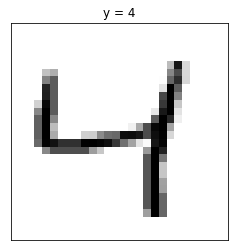

In [9]:
# Exemplo de uma imagem
i = 2
plt.imshow(x_train[i], cmap=plt.cm.gray_r);
plt.title('y = {}'.format(y_train[i]));
plt.xticks([]);
plt.yticks([]);

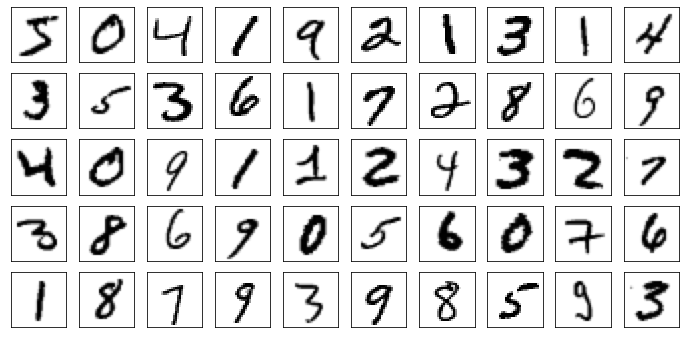

In [10]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.gray_r);
    plt.xticks([]);
    plt.yticks([]);

## Tarefas

1. Separe um conjunto de validação com 5000 amostras (por exemplo, as últimas 5000 amostras do conjunto de treinamento). Confirme que a distribuição das classes é parecida com a do conjunto de treinamento (não precisa ser exatamente igual).

#### Dica
- Para calcular e visualizar um histograma, você pode utilizar a função `plt.hist()`, opcionalmente definindo os parâmetros `density` e `alpha`, entre outros.

In [11]:
x_val = x_train[55000:]
y_val = y_train[55000:]

print(x_val.shape)
print(y_val.shape)

(5000, 28, 28)
(5000,)


(array([0.10968519, 0.12485185, 0.11033333, 0.11353704, 0.10818519,
        0.10038889, 0.10959259, 0.11601852, 0.10835185, 0.11016667]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

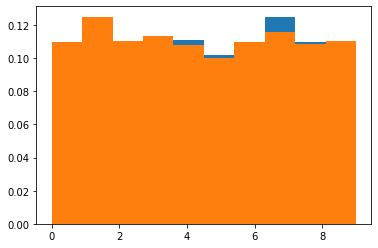

In [12]:
plt.hist(y_val,density="True")
plt.hist(y_train,density="True")

2. Para desenvolvimento do modelo, considere um subconjunto de treinamento com poucas amostras, por exemplo, as primeiras 10000, e também um número pequeno de épocas, por exemplo, 10. Isso vai permitir uma rápida experimentação. Uma vez finalizado o desenvolvimento, você poderá aumentar esses valores. Inicialmente, construa um modelo **baseline** sem nenhuma camada oculta (o que corresponde a uma regressão softmax), treine-o e confirme que está funcionando corretamente. Deve ser possível atingir >90% de acurácia de treinamento com facilidade.
1. Por hora, ignore o conjunto de validação. Aprimore o modelo adicionando mais camadas e tente obter 100% de acurácia de treinamento (com o conjunto reduzido) e apenas 10 épocas. O objetivo é garantir que o modelo possui capacidade suficiente para este problema. Fique à vontade para variar quaisquer hiperparâmetros do modelo ou do treinamento, mas utilize apenas conceitos já abordados na disciplina (i.e., não utilize camadas convolucionais). Tenha em mente as seguintes observações:
 - A taxa de aprendizado é provavelmente o hiperparâmetro mais importante, no sentido de que, mesmo que você consiga supostamente encontrar os melhores valores de todos os demais hiperparâmetros (inclusive da arquitetura do modelo), ainda assim o modelo poderá ter um desempenho ruim se a taxa de aprendizado não for ajustada adequadamente.
 - Em geral, cada modificação em algum hiperparâmetro pode exigir um novo ajuste da taxa de aprendizado (i.e., o seu valor ótimo pode mudar), embora alguns hiperparâmetros tenham um impacto maior do que outros.
 - O batch size tem um impacto grande na velocidade do treinamento, além de impactar no desempenho do modelo. De maneira geral, aumentar o batch size reduz o tempo de treinamento de uma época (por quê?), mas pode piorar o desempenho para um número fixo de épocas (por quê?). Assim, uma recomendação básica é utilizar o maior batch size possível tal que o desempenho do modelo (para um número fixo de épocas) não apresente degradação significativa. **Minimizar o tempo de treinamento é essencial para uma rápida experimentação.**
 - Naturalmente, o desempenho ótimo para cada valor de batch size envolve um ajuste da taxa de aprendizado. Uma regra prática (empírica) é: se o batch size é multiplicado por um fator F, então, para obter um desempenho semelhante, a taxa de aprendizado também deve ser multiplicada por F. Note que essa regra não é exata, mas serve como um bom ponto de partida.
1. Relate suas principais observações sobre quais abordagens foram bem sucedidas ou não.

#### Dicas
- Lembre que é preciso especificar a camada de saída, com 10 unidades, e ativação softmax.
- Um modelo com 2 camadas ocultas, com ~200 unidades por camada, é suficiente para obter um bom desempenho nesse problema, mas fique à vontade para experimentar outras arquiteturas.
- Para um problema multi-classe com codificação compacta $y \in \{0,1,\ldots,9\}$ (i.e., que **não** é *one-hot encoding*), a função perda adequada é a `'sparse_categorical_crossentropy'`. Nesse caso não é necessário codificar como *one-hot*.
- O Keras permite monitorar, durante o treinamento, não apenas a perda, mas também outras métricas, como a acurácia, tanto de treinamento quanto de validação. Para isso, configure o parâmetro `metrics` ao executar `model.compile`. As curvas estarão disponíveis no parâmetro history.
- Para avaliar o efeito de um hiperparâmetro, é muito útil garantir que não há outras fontes de "ruído" ou variação, assim cada hiperparâmetro pode ser avaliado isoladamente. Ou seja, é útil variar um hiperparâmetro de cada vez.
- Para medir o tempo de execução de uma célula do notebook, utilize `%%time` na primeira linha da célula.
- É usual (e tipicamente suficiente) variar o batch size em potências de 2.
- Se desejar utilizar a GPU do Colab para acelerar o treinamento (**recomendável**), selecione-a no menu *Runtime/Change runtime type* (e reinicie o notebook). No entanto, note que, quando a GPU é utilizada, a reproducibilidade de um modelo não pode mais ser garantida pelo uso comando `tf.random.set_seed()`. Isso ocorre por causa da ordem aleatória em que as operações são executadas em paralelo na GPU.
- A função `fit` do Keras utiliza *warm start*, isto é, a cada vez que a função é chamada, o treinamento do modelo **continua** do ponto em que parou. Se você deseja reiniciar o treinamento do zero, é necessário construir o modelo novamente. Para deixar o código mais compacto, é conveniente definir uma função de criação do modelo (que retorna o modelo inicializado), a qual deve ser chamada antes do treinamento. Por exemplo.

```python
def make_model():
  ...
  return model
...
model = make_model()
model.compile(...)
history = model.fit(...)
```

In [14]:
x_sub_train = x_train[:10000]
y_sub_train = y_train[:10000]

print(x_sub_train.shape)
print(y_sub_train.shape)

(10000, 28, 28)
(10000,)


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 175)               137375    
                                                                 
 dense_42 (Dense)            (None, 175)               30800     
                                                                 
 dense_43 (Dense)            (None, 10)                1760      
                                                                 
Total params: 169,935
Trainable params: 169,935
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 1s 1ms/step - loss: 0.4947 - accuracy: 0.8456 - val_loss: 0.2639 - val_accuracy: 0.9164
Epoch 2/10
313/313 [=================

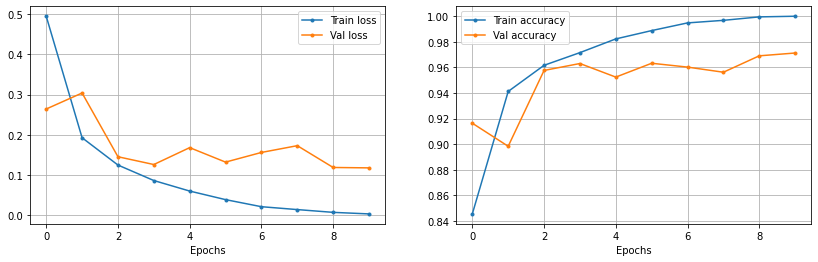

In [49]:
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(175,activation='relu'))
model.add(Dense(175,activation='relu'))
model.add(Dense(10,activation='softmax'))

sgd = SGD(lr=0.25)

model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

history = model.fit(x_sub_train, y_sub_train,
              batch_size=32,
              epochs=10,
              validation_data=(x_val,y_val))
plots(history)

5. Agora, monitore também a acurácia de validação ao longo do treinamento, e ao final trace dois gráficos em função do número de épocas, um com a perda de treinamento e de validação e outro com a acurácia de treinamento e de validação.
1. Altere o tamanho do conjunto de treinamento para 55000 e veja se consegue obter uma acurácia de validação de pelo menos 98% (em alguma época). A partir de agora, utilize quantas épocas desejar. (Note que um modelo treinado com um número maior de amostras pode levar mais épocas para atingir um bom desempenho.) Ao final do treinamento, sempre trace as curvas de perda e acurácia para os dois conjuntos.
1. A partir de agora, não altere mais a arquitetura do modelo nem seus hiperparâmetros; altere apenas o tamanho do conjunto de treinamento, em intervalos de 5 a 10 mil amostras, até o máximo de 55000. Trace um gráfico da acurácia de treinamento e da acurácia máxima de validação (entre todas as épocas) em função do tamanho do conjunto de treinamento. Esta curva é conhecida em alguns contextos como curva de aprendizado (*learning curve*). O que você pode concluir a partir desses resultados?
1. Finalmente, utilize todas as 60000 amostras para treinamento (e naturalmente não utilize conjunto de validação), com um número de épocas apropriadamente escolhido. Em seguida, meça o desempenho no conjunto de teste.


In [50]:
x_new_train = x_train[:55000]
y_new_train = y_train[:55000]

print(x_new_train.shape)
print(y_new_train.shape)

(55000, 28, 28)
(55000,)


Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1279 - accuracy: 0.9624 - val_loss: 0.1245 - val_accuracy: 0.9594
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0734 - accuracy: 0.9772 - val_loss: 0.0825 - val_accuracy: 0.9782
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.0697 - val_accuracy: 0.9802
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.0876 - val_accuracy: 0.9776
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0309 - accuracy: 0.9897 - val_loss: 0.0798 - val_accuracy: 0.9792
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0870 - val_accuracy: 0.9792
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0894 - val_accuracy:

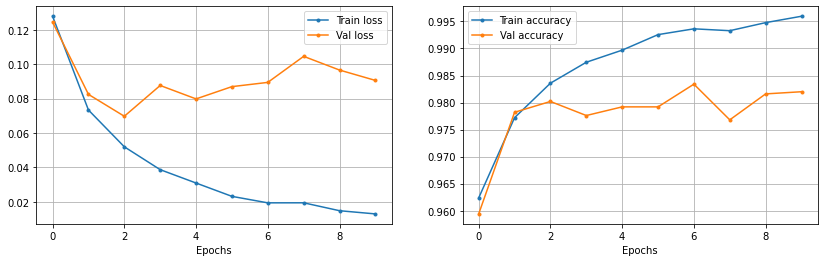

In [51]:
history = model.fit(x_new_train, y_new_train,
              batch_size=32,
              epochs=10,
              validation_data=(x_val,y_val))
plots(history)

9. Para o modelo final que você desenvolveu, mostre alguns exemplos de predições erradas no conjunto de teste. Para isso, rode as células abaixo:

In [52]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
wrong = np.where(y_test != y_pred_class)[0]

313/313 [==============================] - 0s 572us/step


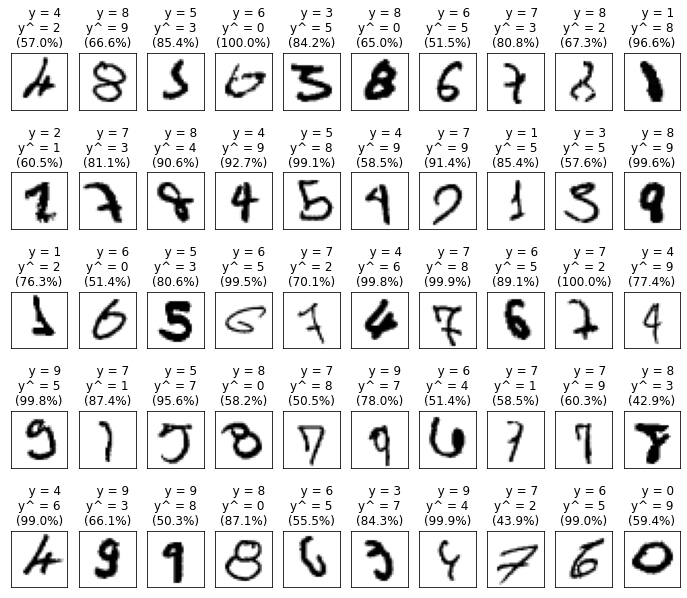

In [53]:
plt.figure(figsize=(12,1.8*12))
for i in range(50):
  j = wrong[i]
  plt.subplot(10,10,i+1)
  plt.imshow(x_test[j], cmap=plt.cm.gray_r);
  plt.title('   y = {}\ny^ = {}\n({:.1%})'.format(y_test[j], y_pred_class[j], y_pred[j][y_pred_class[j]]))
  plt.xticks([]); plt.yticks([]);

10. Visualize como uma imagem os pesos da primeira camada oculta. Para isso, rode a célula abaixo:

In [54]:
W = model.weights[0].numpy()
vmax = np.abs(W).max()
@interact(i=(0,int(np.ceil(W.shape[1]/10))-1))
def _(i=0):
  plt.figure(figsize=(16,2.4));
  # para ver de 10 em 10
  for j in range(min(10, W.shape[1]-10*i)):
    plt.subplot(1,10,j+1)
    w = W[:,10*i+j].reshape(28,28)
    plt.imshow(w, cmap=plt.cm.bwr, vmin=-vmax, vmax=vmax); # (-,0,+) = (blue, white, red)
    plt.xticks([]);
    plt.yticks([]);

interactive(children=(IntSlider(value=0, description='i', max=17), Output()), _dom_classes=('widget-interact',…

11. Relate suas principais conclusões com este exercício.
1. (OPCIONAL) O que acontece se é aplicada uma permutação aleatória nos pixels de todas as imagens (a mesma permutação para todas as imagens)? O desempenho do modelo se altera? Você consegue identificar corretamente os dígitos? O que podemos concluir sobre o aprendizado do modelo?

#### Dicas
- Funções úteis: `plt.figure(figsize=(...))`, `plt.subplot()`, `plt.plot(..., label=...)`, `plt.xlabel()`, `plt.legend()`
- Quando usamos *early stopping*, perdemos parcialmente o controle sobre o número de épocas de treinamento como um hiperparâmetro. Nesse caso, após o desenvolvimento de um modelo, se desejarmos identificar seus hiperparâmetros, é conveniente registrar e fixar o número de épocas de treinamento efetivamente utilizadas e parar de utilizar *early stopping*.
- Se quiser salvar o melhor modelo encontrado, mas sem usar *early stopping*, você pode utilizar a *callback* `tf.keras.callbacks.ModelCheckpoint`. Alternativamente, você pode usar *early stopping* com uma paciência suficientemente grande (maior que o número de épocas).